In [1]:
# import packages
import os
import scipy.io as sio
import matlab.engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Generate Data with MATLAB

In [15]:
# connect matlab engine to the existing matlab session
eng = matlab.engine.connect_matlab()
eng.cd(r'C:\Users\ishparii\dev\SkyFall_GLM', nargout=0)
eng.ls(nargout=0)

In [16]:
# run matlab script to put data together
data_CF = eng.TrainingDataSetup([],[],1,0) #location -use all; subjID - use all; n jitter - 1; condition - healthy

In [17]:
data_CF_np = np.array(data_CF)
data_CF_df = pd.DataFrame(data_CF_np)

print(data_CF_df.shape)
data_CF_df.head()


(650, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.132226,0.074660,-0.118888,0.012579,0.049360,0.051680,...,2.235428,4.997699,0.721928,0.787661,0.053909,0.085895,0.071485,0.090722,0.046334,0.127110
1,1.0,1.0,1.0,3.0,-0.077828,0.070436,-0.217299,-0.028075,0.042425,0.076308,...,2.235353,4.997421,0.721928,0.804926,0.055249,0.092283,0.096109,0.103435,0.095055,0.080526
2,1.0,1.0,1.0,3.0,-0.006114,0.034498,-0.206166,-0.025551,0.034052,0.071821,...,2.231253,4.982409,1.370951,0.817524,0.055180,0.096682,0.093441,0.077564,0.101474,0.067335
3,1.0,1.0,1.0,4.0,-0.154483,0.024149,0.316410,-0.031890,0.042762,0.069643,...,2.235787,4.998989,0.721928,0.516624,0.039205,0.099017,0.071918,0.094359,0.072023,0.086206
4,1.0,1.0,1.0,4.0,-0.163624,0.023899,0.322660,-0.042376,0.007777,0.056139,...,2.235998,4.999749,0.721928,0.685685,0.048051,0.093172,0.083448,0.118911,0.063367,0.049815


In [4]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_CF_df=data_CF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_CF_df.to_csv('data_CF_10sec.csv')

data_CF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.132226,0.074660,-0.118888,0.012579,0.049360,0.051680,...,2.235428,4.997699,0.721928,0.787661,0.053909,0.085895,0.071485,0.090722,0.046334,0.127110
1,1.0,1.0,1.0,3.0,-0.077828,0.070436,-0.217299,-0.028075,0.042425,0.076308,...,2.235353,4.997421,0.721928,0.804926,0.055249,0.092283,0.096109,0.103435,0.095055,0.080526
2,1.0,1.0,1.0,3.0,-0.006114,0.034498,-0.206166,-0.025551,0.034052,0.071821,...,2.231253,4.982409,1.370951,0.817524,0.055180,0.096682,0.093441,0.077564,0.101474,0.067335
3,1.0,1.0,1.0,4.0,-0.154483,0.024149,0.316410,-0.031890,0.042762,0.069643,...,2.235787,4.998989,0.721928,0.516624,0.039205,0.099017,0.071918,0.094359,0.072023,0.086206
4,1.0,1.0,1.0,4.0,-0.163624,0.023899,0.322660,-0.042376,0.007777,0.056139,...,2.235998,4.999749,0.721928,0.685685,0.048051,0.093172,0.083448,0.118911,0.063367,0.049815


In [19]:
data_AF = eng.TrainingDataSetup([],[],1,1) #location -use all; subjID - use all; n jitter - 1; condition - amputees
# data_AF

In [20]:
data_AF_np = np.array(data_AF)
data_AF_df = pd.DataFrame(data_AF_np)

print(data_AF_df.shape)
data_AF_df.head()

(495, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.294355,-0.463993,-0.127688,-0.018617,-0.188849,-0.048380,...,2.218388,4.934733,1.370951,0.039994,0.404270,0.132761,0.115437,1.319767,0.176988,0.242063
1,3.0,1.0,0.0,3.0,-0.380459,-0.552352,-0.172389,-0.013745,-0.159367,-0.036240,...,0.717063,-2.702712,1.370951,0.819159,0.044564,0.059319,0.094200,0.043299,0.101479,0.082715
2,3.0,1.0,0.0,3.0,-0.448509,-0.503266,-0.089075,-0.011493,-0.167085,-0.031274,...,2.211177,4.906145,1.370951,0.096272,0.531889,0.218618,0.189642,2.667211,0.100258,0.137136
3,3.0,1.0,0.0,4.0,0.598852,0.202159,-0.218131,-0.005727,-0.054691,-0.065409,...,2.235712,4.998730,0.721928,0.797221,0.088376,0.146912,0.108771,0.188578,0.156980,0.162251
4,3.0,1.0,0.0,4.0,0.416110,0.042183,-0.177830,-0.008599,-0.141454,-0.050355,...,2.235759,4.998889,0.721928,0.799086,0.069129,0.082523,0.119970,0.166548,0.176009,0.081968


In [21]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_AF_df=data_AF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_AF_df.to_csv('data_AF_10sec.csv')

data_AF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.294355,-0.463993,-0.127688,-0.018617,-0.188849,-0.048380,...,2.218388,4.934733,1.370951,0.039994,0.404270,0.132761,0.115437,1.319767,0.176988,0.242063
1,3.0,1.0,0.0,3.0,-0.380459,-0.552352,-0.172389,-0.013745,-0.159367,-0.036240,...,0.717063,-2.702712,1.370951,0.819159,0.044564,0.059319,0.094200,0.043299,0.101479,0.082715
2,3.0,1.0,0.0,3.0,-0.448509,-0.503266,-0.089075,-0.011493,-0.167085,-0.031274,...,2.211177,4.906145,1.370951,0.096272,0.531889,0.218618,0.189642,2.667211,0.100258,0.137136
3,3.0,1.0,0.0,4.0,0.598852,0.202159,-0.218131,-0.005727,-0.054691,-0.065409,...,2.235712,4.998730,0.721928,0.797221,0.088376,0.146912,0.108771,0.188578,0.156980,0.162251
4,3.0,1.0,0.0,4.0,0.416110,0.042183,-0.177830,-0.008599,-0.141454,-0.050355,...,2.235759,4.998889,0.721928,0.799086,0.069129,0.082523,0.119970,0.166548,0.176009,0.081968


# Read Data from CSV

In [5]:
# read data from csv files
data_CF_df = pd.read_csv('data_CF_10sec.csv', index_col=0)
data_CF_df.head()

data_AF_df = pd.read_csv('data_AF_10sec.csv', index_col=0)

print('Healthy data size: ', data_CF_df.shape)
print('Amputee data size: ', data_AF_df.shape)

data_AF_df.head()

Healthy data size:  (650, 1215)
Amputee data size:  (495, 1215)


,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.294355,-0.463993,-0.127688,-0.018617,-0.188849,-0.048380,...,2.218388,4.934733,1.370951,0.039994,0.404270,0.132761,0.115437,1.319767,0.176988,0.242063
1,3.0,1.0,0.0,3.0,-0.380459,-0.552352,-0.172389,-0.013745,-0.159367,-0.036240,...,0.717063,-2.702712,1.370951,0.819159,0.044564,0.059319,0.094200,0.043299,0.101479,0.082715
2,3.0,1.0,0.0,3.0,-0.448509,-0.503266,-0.089075,-0.011493,-0.167085,-0.031274,...,2.211177,4.906145,1.370951,0.096272,0.531889,0.218618,0.189642,2.667211,0.100258,0.137136
3,3.0,1.0,0.0,4.0,0.598852,0.202159,-0.218131,-0.005727,-0.054691,-0.065409,...,2.235712,4.998730,0.721928,0.797221,0.088376,0.146912,0.108771,0.188578,0.156980,0.162251
4,3.0,1.0,0.0,4.0,0.416110,0.042183,-0.177830,-0.008599,-0.141454,-0.050355,...,2.235759,4.998889,0.721928,0.799086,0.069129,0.082523,0.119970,0.166548,0.176009,0.081968


In [6]:
#Healthy Falls vs Non-falls
print('Healthy:')
print ('Nfalls = ', len(data_CF_df[data_CF_df.label<9]))
print ('Nactivities = ', len(data_CF_df[data_CF_df.label==9]))

#Amp Falls vs Non-Falls
print('Amputees:')
print ('Nfalls = ', len(data_AF_df[data_AF_df.label<9]))
print ('Nactivities = ', len(data_AF_df[data_AF_df.label==9]))

Healthy:
Nfalls =  335
Nactivities =  315
Amputees:
Nfalls =  188
Nactivities =  307


In [7]:
# make right and left latheral falls as 1 category
data_CF_df.loc[data_CF_df.label == 4, ['label']] = 3
data_AF_df.loc[data_AF_df.label == 4, ['label']] = 3

# change amputee subjects ids
max_id_CF = data_CF_df.subj_id.max()
print(max_id_CF)
data_AF_df.subj_id = data_AF_df.subj_id + max_id_CF
print(data_AF_df.subj_id.unique())

10.0
[ 13.  14.  15.  12.  16.  17.  11.]


# Splitting Data

In [17]:
# training and testing data split
# training on healthy and testing on amputees

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_train = data_CF_df[(data_CF_df.location == 1) & ((data_CF_df.label>0) & (data_CF_df.label<=4))]
data_test = data_AF_df[(data_AF_df.location == 1) & ((data_AF_df.label>0) & (data_AF_df.label<=4))]

print(data_train.shape)
print(data_test.shape)

(107, 1215)
(75, 1215)


In [25]:
# training and testing data split
# mix data 

import random
from sklearn.utils import shuffle

data = data_CF_df
full_data = data.append(data_AF_df)

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
full_data = full_data[(full_data.location == 2) & ((full_data.label>0) & (full_data.label<4))]
print("Data size: ", full_data.shape)
print()

subj_ids = np.sort(np.array(full_data.subj_id.unique()))
print("All subjects ids: ",subj_ids)

# first and last subjects ids for testing (hardcoded, could be changed)
test_subjects = subj_ids[np.r_[0:1, -1:0]]
print("Subjects for testing: ",test_subjects)

train_subjects = np.setdiff1d(subj_ids,test_subjects)
print("Subjects for training: ",train_subjects)

data_train = full_data.loc[full_data['subj_id'].isin(train_subjects)]
data_test = full_data.loc[full_data['subj_id'].isin(test_subjects)]

# group data by subject
#groups = full_data.groupby('subj_id')
#groups.head()

#random.shuffle(groups)

#for g, grp in groups:
#    print (grp)

#data = pd.DataFrame(groups)
#print(data.shape)
#data.head()

#data_train, data_test = train_test_split(data, test_size=0.3)
print("Training data size: ", data_train.shape)
print("Testing data size: ",data_test.shape)

Data size:  (170, 1215)

All subjects ids:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  12.  13.  14.  15.  17.]
Subjects for testing:  [  1.  17.]
Subjects for training:  [  2.   3.   4.   5.   6.   7.   8.   9.  10.  12.  13.  14.  15.]
Training data size:  (146, 1215)
Testing data size:  (24, 1215)


# Feature Selection

In [18]:
# list of features
features = list(range(4,1215))
features = np.array(features)

In [117]:
# optional
# handpicking features

# feature groups:
#       1 - Raw Signal Statistics
#       2 - Raw Signal Correlation Coefficients
#       3 - Raw Signal 5s FFT bins
#       4 - Raw Signal 1s FFT bins
#		5 - Derivative Statistics
#		6 - Derivative 5s FFT bins
#		7 - Derivative 1s FFT bins
#		8 - Resultant Vector and Magnitude 
#		9 - Angle Statistics (ArcTan)
#		10 - Entropies
#		11 - Raw Signal Cross Products
#		12 - Derivative Cross Products
#		13 - Raw Signal Statistics on 1s FFT bins
#		14 - Raw Signal Entropies on 1s FFT bins
#		15 - Raw Signal Statistics on 1s binned signal energy
#		16 - Derivative Statistics on 1s FFT bins
#		17 - Derivative Entropies on 1s FFT bins
#		18 - Barometer

features_to_use = eng.getFeatureInds(matlab.logical([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]))

features_to_use = np.array(features_to_use)
features_to_use = [y for x in features_to_use for y in x] # flatten array
features_to_use = np.array(features_to_use)

features = features[features_to_use]
print(features)
print(len(features))

[   4    5    6    7    8    9   10   11   12   13   14   15   16   17   18
   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33
   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48
   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63
   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78
   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93
   94   95   96   97   98   99  340  341  342  343  344  345  346  347  348
  349  350  351  352  353  354  355  356  357  358  359  360  361  362  363
  364  365  366  367  368  369  370  371  372  373  374  375  376  377  378
  379  380  381  382  383  384  385  386  387  388  389  390  391  392  393
  394  395  396  397  398  399  400  401  402  403  404  405  406  407  408
  409  410  411  412  413  414  415  416  606  607  608  609  610  611  612
  613  614  615  616  617  618  619  620  621  622  623  624  625  626  627
  628  629  

Feature ranking:
1. feature 867 (0.015514)
2. feature 865 (0.014516)
3. feature 954 (0.013927)
4. feature 701 (0.012944)
5. feature 863 (0.012878)
6. feature 881 (0.011751)
7. feature 702 (0.010955)
8. feature 1030 (0.009242)
9. feature 96 (0.009080)
10. feature 716 (0.009011)
11. feature 868 (0.008983)
12. feature 705 (0.008668)
13. feature 271 (0.008405)
14. feature 261 (0.008346)
15. feature 276 (0.008130)
16. feature 707 (0.007843)
17. feature 953 (0.007806)
18. feature 100 (0.007552)
19. feature 268 (0.007486)
20. feature 883 (0.007426)
21. feature 97 (0.007371)
22. feature 1114 (0.007262)
23. feature 102 (0.007170)
24. feature 385 (0.007146)
25. feature 263 (0.006943)
26. feature 706 (0.006767)
27. feature 882 (0.006707)
28. feature 262 (0.006658)
29. feature 278 (0.006406)
30. feature 106 (0.006364)
31. feature 703 (0.006326)
32. feature 873 (0.006165)
33. feature 884 (0.006063)
34. feature 280 (0.006014)
35. feature 869 (0.005791)
36. feature 717 (0.005628)
37. feature 337 (0.0

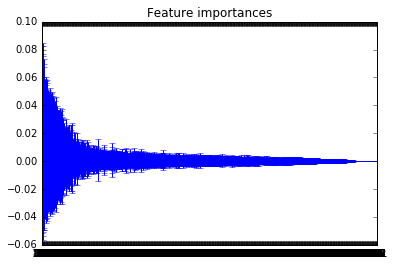

In [19]:
# features analysis
# feature ranking with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = data_train[features]
Y = data_train['label']

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [20]:
# normalize feature importances
importances = np.array(importances)
importances /= importances.max()

# select features > 25 % importance
features = [i for i,j in zip(features,importances) if j > 0.25]

# X = data_train[features]
# Y = data_train['label']

print ("Selected number of features: %d" % len(features))

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Selected number of features: 61
1. feature 867 (1.000000)
2. feature 865 (0.935689)
3. feature 954 (0.897709)
4. feature 701 (0.834312)
5. feature 863 (0.830060)
6. feature 881 (0.757414)
7. feature 702 (0.706113)
8. feature 1030 (0.595682)
9. feature 96 (0.585253)
10. feature 716 (0.580812)
11. feature 868 (0.579029)
12. feature 705 (0.558706)
13. feature 271 (0.541748)
14. feature 261 (0.537989)
15. feature 276 (0.524042)
16. feature 707 (0.505542)
17. feature 953 (0.503183)
18. feature 100 (0.486789)
19. feature 268 (0.482527)
20. feature 883 (0.478690)
21. feature 97 (0.475086)
22. feature 1114 (0.468059)
23. feature 102 (0.462169)
24. feature 385 (0.460631)
25. feature 263 (0.447517)
26. feature 706 (0.436194)
27. feature 882 (0.432344)
28. feature 262 (0.429177)
29. feature 278 (0.412935)
30. feature 106 (0.410208)
31. feature 703 (0.407783)
32. feature 873 (0.397405)
33. feature 884 (0.390820)
34. feature 280 (0.387651)
35. feature 869 (0.373254)
36. feature 717 (0.362753)
37. f

# Random Forest Hyperparameter Tuning with LOSO CV

In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.cross_validation import train_test_split
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier

C:\Users\ishparii\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ishparii\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
# setting data for training
X = data_train[features] # data for training
Y = data_train['label'] # target labels
groups = data_train['subj_id']

In [22]:
# Random Forest
model = RandomForestClassifier()
params_set = {'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200],
#                                           'max_depth': [5, 10, 20, 30, 50],
#                                           'min_samples_leaf': [1, 3, 5, 7, 10, 20, 50],
#                                           'min_samples_split': [1, 3, 5, 7, 10]
                                          }

# Leave One Group Out
logo = LeaveOneGroupOut()
cv = logo.get_n_splits(X,Y,groups)

clf = GridSearchCV(model, params_set, cv=cv)
clf.fit(X, Y)
best_params = clf.best_params_
best_estimator = clf.best_estimator_

print("Best score: ", clf.best_score_)
print()
print("Best parameters: ", best_params)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))

Best score:  0.9158878504672897

Best parameters:  {'n_estimators': 10}

Grid scores on development set:

0.738 (+/-0.276) for {'n_estimators': 1}
0.916 (+/-0.183) for {'n_estimators': 10}
0.869 (+/-0.147) for {'n_estimators': 20}
0.869 (+/-0.156) for {'n_estimators': 30}
0.841 (+/-0.219) for {'n_estimators': 40}
0.860 (+/-0.195) for {'n_estimators': 50}
0.850 (+/-0.180) for {'n_estimators': 60}
0.888 (+/-0.173) for {'n_estimators': 70}
0.841 (+/-0.200) for {'n_estimators': 80}
0.869 (+/-0.156) for {'n_estimators': 90}
0.860 (+/-0.175) for {'n_estimators': 100}
0.879 (+/-0.154) for {'n_estimators': 150}
0.888 (+/-0.150) for {'n_estimators': 200}


In [24]:
# Extra Trees Classifier
extraTrees = ExtraTreesClassifier()

clf = GridSearchCV(extraTrees, params_set, cv=cv)
clf.fit(X, Y)
best_params = clf.best_params_
best_extraTrees = clf.best_estimator_

print("Best score: ", clf.best_score_)
print()
print("Best parameters: ", best_params)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))

Best score:  0.9065420560747663

Best parameters:  {'n_estimators': 60}

Grid scores on development set:

0.748 (+/-0.286) for {'n_estimators': 1}
0.860 (+/-0.236) for {'n_estimators': 10}
0.888 (+/-0.176) for {'n_estimators': 20}
0.888 (+/-0.143) for {'n_estimators': 30}
0.869 (+/-0.170) for {'n_estimators': 40}
0.897 (+/-0.147) for {'n_estimators': 50}
0.907 (+/-0.127) for {'n_estimators': 60}
0.888 (+/-0.167) for {'n_estimators': 70}
0.879 (+/-0.151) for {'n_estimators': 80}
0.888 (+/-0.140) for {'n_estimators': 90}
0.888 (+/-0.140) for {'n_estimators': 100}
0.869 (+/-0.156) for {'n_estimators': 150}
0.897 (+/-0.133) for {'n_estimators': 200}


# Testing on Validation Data Set

In [23]:
#fitting random forest to test_data
classifier = best_estimator
classifier.fit(X, Y)
score = classifier.score(data_test[features], data_test['label'])
print("Prediction accuracy: ", score)
expected = data_test['label']
predicted = classifier.predict(data_test[features])

print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Prediction accuracy:  0.733333333333
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

        1.0       0.37      0.47      0.41        15
        2.0       0.60      0.33      0.43        18
        3.0       0.91      1.00      0.95        42

avg / total       0.73      0.73      0.72        75


Confusion matrix:
[[ 7  4  4]
 [12  6  0]
 [ 0  0 42]]


In [25]:
#fitting extra trees clf to test_data
classifier = best_extraTrees
classifier.fit(X, Y)
score = classifier.score(data_test[features], data_test['label'])
print("Prediction accuracy: ", score)
expected = data_test['label']
predicted = classifier.predict(data_test[features])

print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Prediction accuracy:  0.706666666667
Classification report for classifier ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False):
             precision    recall  f1-score   support

        1.0       0.38      0.53      0.44        15
        2.0       0.45      0.28      0.34        18
        3.0       0.93      0.95      0.94        42

avg / total       0.71      0.71      0.70        75


Confusion matrix:
[[ 8  4  3]
 [13  5  0]
 [ 0  2 40]]
